<a href="https://colab.research.google.com/github/huiislearning/Machine-Learning-with-Python/blob/master/Taipei_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/hxuz/DS_draft_project_csvs/master/Real%20estate%20valuation%20data%20set.csv')



In [410]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Let's change transaction date to year and months 


In [411]:
data["X1 transaction date"].dtype

dtype('float64')

In [0]:
data["Year"]=data["X1 transaction date"].astype(int)

In [413]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [0]:
data["month"]=(data["X1 transaction date"]-data["Year"])*12

In [0]:
data["month"]=data["month"].round()
data["month"]=data["month"].astype(int)

In [416]:
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,Nov
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,Nov
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,Jul
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,Jun
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,Oct


One-hot key encoding

Drop thee first one in each category because we are setting Month_ or Month_Dec and Year_2012 as reference


In [417]:
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Year'], prefix = ['Year'],drop_first=True)
data_onehot = pd.get_dummies(data_onehot, columns=['month'], prefix = ['Month'], drop_first=True)
data_onehot.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year_2013,Month_Apr,Month_Aug,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,0,0,0,0,0,1,0,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,0,0,0,0,0,1,0,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,0,1,0,0,0,0,0,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,0,0,1,0,0,0,0,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,0,0,0,0,0,0,1,0


Rename columns

In [418]:
# Drop first two columns
data_clean = data_onehot.drop(['No','X1 transaction date'], axis =1)
data_clean.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year_2013,Month_Apr,Month_Aug,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,0,0,0,0,0,1,0,0
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,0,0,0,0,0,1,0,0
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,0,1,0,0,0,0,0,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,0,0,1,0,0,0,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,0,0,0,0,0,0,1,0


In [420]:
data_clean.columns = ['Age', 'Dis_to_MRT', 'Num_conv_stores','Lat','Long','Price','2013','Apr','Aug','Feb','Jan','Jul','Jun',
                     'Mar','May','Nov','Oct','Sep']
data_clean.head()

,Age,Dis_to_MRT,Num_conv_stores,Lat,Long,Price,2013,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,0,0,0,0,0,1,0,0
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,0,0,0,0,0,1,0,0
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,0,1,0,0,0,0,0,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,0,0,1,0,0,0,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,0,0,0,0,0,0,1,0


Check missing variables


In [421]:
data_clean.isnull().sum()

Age                0
Dis_to_MRT         0
Num_conv_stores    0
Lat                0
Long               0
Price              0
2013               0
Apr                0
Aug                0
Feb                0
Jan                0
Jul                0
Jun                0
Mar                0
May                0
Nov                0
Oct                0
Sep                0
dtype: int64

First, let's run a linear regression using all variables

In [0]:
from sklearn import linear_model

Use train_test_split feature to split the 75% of the data into training set, and 25% of the data into test set.

In [0]:
Independent_Variables = data_clean.drop(['Price'],axis =1)
Dependent_Variables = data_clean['Price']

In [424]:
x_train, x_test, y_train, y_test = train_test_split(Independent_Variables, Dependent_Variables,
                                                    train_size=0.75, test_size=0.25)
print('Size of the training set:')
print(len(x_train), len(y_train))
print('')
print('Size of the test set:')
print(len(x_test), len(y_test))

Size of the training set:
310 310

Size of the test set:
104 104


In [425]:
list(Independent_Variables)

['Age',
 'Dis_to_MRT',
 'Num_conv_stores',
 'Lat',
 'Long',
 '2013',
 'Apr',
 'Aug',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep']

Run linear regression

In [426]:
reg1 = linear_model.LinearRegression()
reg1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [427]:
# Make predictions using the training and test set
y_pred_train = reg1.predict(x_train)
y_pred_test = reg1.predict(x_test)
print ("Fit a model x_train, and calculate MSE with y_train:", np.mean((y_train - reg1.predict(x_train)) ** 2))
print ("Fit a model x_test, and calculate MSE with y_test:", np.mean((y_test - reg1.predict(x_test)) ** 2))

Fit a model x_train, and calculate MSE with y_train: 75.85371665295136
Fit a model x_test, and calculate MSE with y_test: 76.86097200591554


In [428]:
# The coefficients
coeff_df = pd.DataFrame(reg1.coef_, Independent_Variables.columns, columns=['Coefficient'])  
coeff_df  

,Coefficient
Age,-0.311309
Dis_to_MRT,-0.004346
Num_conv_stores,1.083071
Lat,232.209258
Long,4.905227
2013,1.105297
Apr,3.947073
Aug,0.764848
Feb,-0.310864
Jan,1.750673


In [429]:
# R square
print(reg1.score(x_train, y_train))
print(reg1.score(x_test, y_test))

0.5940529265208945
0.5597038940088279


In [430]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) 

Mean Absolute Error: 6.267823818196239
Mean Squared Error: 76.86097200591554
Root Mean Squared Error: 8.767038953142363


In [0]:
import statsmodels.api as sm
from scipy import stats

In [432]:
x_train_2 = sm.add_constant(x_train)
x_test_2 =sm.add_constant(x_test)
reg2 = sm.OLS(y_train, x_train_2)
results = reg2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     26.80
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           4.09e-48
Time:                        08:08:07   Log-Likelihood:                -1110.8
No. Observations:                 310   AIC:                             2256.
Df Residuals:                     293   BIC:                             2319.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5293.6856   5896.128     

In [433]:
y_pred_test_2 = results.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))) 


Mean Absolute Error: 6.267823818196562
Mean Squared Error: 76.86097200592211
Root Mean Squared Error: 8.767038953142738


As you cans ee that we got the same RMSE and R squares as before but after analyzing p-value, most of the independent variable coefficient is not statisticaly significant. If you look at the 95% confidence interval, zero is in the range for variables such as Long, 2013 and the month dummy variables. This means we can't be sure that these independent variables are statistically significant in predicting housing price. This linear regression doesn't work well.

# Make a technical plan

Before jumping into modelling, we need to first understand the data a bit more.

Check the implicit assumptions of linear regression: 

* Linear relationship: Pairwise linear relationship between each indendent variable and the dependent variable
* Homoscedasticity: Transforming variables to be normally distributed can overcome concerns around non-homoscedasticity (non-normal distribution of prediction errors)
* No or little multicollinearity: Correlation matrix will alert us whether we need to drop any variables to reduce multicollinearity

After that, we will select features to go into initial linear model, and tweak the features until we have a good model

# Create a proof of concept

## Creating histograms to check whether any continous variable is skewed and do log transformation

(array([23.,  9., 13., 17., 13., 13., 13.,  6., 10., 11., 34., 22., 17.,
        35., 27., 11.,  9.,  8.,  4.,  2.,  2.,  4.,  6.,  5., 12., 14.,
        15., 11., 12.,  9.,  6.,  9.,  5.,  4.,  1.,  2.]),
 array([ 0.        ,  1.21666667,  2.43333333,  3.65      ,  4.86666667,
         6.08333333,  7.3       ,  8.51666667,  9.73333333, 10.95      ,
        12.16666667, 13.38333333, 14.6       , 15.81666667, 17.03333333,
        18.25      , 19.46666667, 20.68333333, 21.9       , 23.11666667,
        24.33333333, 25.55      , 26.76666667, 27.98333333, 29.2       ,
        30.41666667, 31.63333333, 32.85      , 34.06666667, 35.28333333,
        36.5       , 37.71666667, 38.93333333, 40.15      , 41.36666667,
        42.58333333, 43.8       ]),
 <a list of 36 Patch objects>)

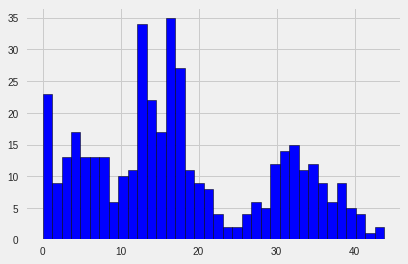

In [434]:
# Univariate Histograms
plt.hist(data_clean['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


(array([73., 74., 82., 27., 13., 11., 13., 19.,  8., 14.,  7., 13., 12.,
         4.,  3.,  0.,  0.,  4.,  0.,  1.,  2.,  1., 16.,  3.,  4.,  5.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  2.]),
 array([  23.38284   ,  202.95612222,  382.52940444,  562.10268667,
         741.67596889,  921.24925111, 1100.82253333, 1280.39581556,
        1459.96909778, 1639.54238   , 1819.11566222, 1998.68894444,
        2178.26222667, 2357.83550889, 2537.40879111, 2716.98207333,
        2896.55535556, 3076.12863778, 3255.70192   , 3435.27520222,
        3614.84848444, 3794.42176667, 3973.99504889, 4153.56833111,
        4333.14161333, 4512.71489556, 4692.28817778, 4871.86146   ,
        5051.43474222, 5231.00802444, 5410.58130667, 5590.15458889,
        5769.72787111, 5949.30115333, 6128.87443556, 6308.44771778,
        6488.021     ]),
 <a list of 36 Patch objects>)

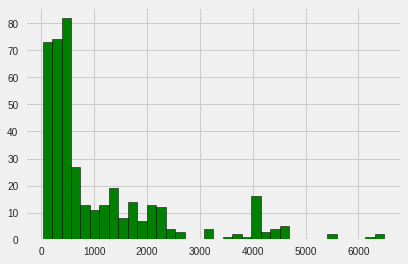

In [435]:
plt.hist(data_clean['Dis_to_MRT'], color = 'green', edgecolor = 'black',
         bins = int(180/5))

(array([ 2.,  0.,  0.,  0.,  2.,  4.,  0.,  0., 14.,  9.,  5.,  4., 11.,
        26.,  2., 18., 29., 31., 28., 33., 26.,  9., 15.,  6., 14.,  5.,
        26., 16., 15., 20.,  3.,  4.,  4., 28.,  2.,  3.]),
 array([3.15200242, 3.30827215, 3.46454189, 3.62081162, 3.77708135,
        3.93335109, 4.08962082, 4.24589056, 4.40216029, 4.55843002,
        4.71469976, 4.87096949, 5.02723922, 5.18350896, 5.33977869,
        5.49604843, 5.65231816, 5.80858789, 5.96485763, 6.12112736,
        6.27739709, 6.43366683, 6.58993656, 6.74620629, 6.90247603,
        7.05874576, 7.2150155 , 7.37128523, 7.52755496, 7.6838247 ,
        7.84009443, 7.99636416, 8.1526339 , 8.30890363, 8.46517337,
        8.6214431 , 8.77771283]),
 <a list of 36 Patch objects>)

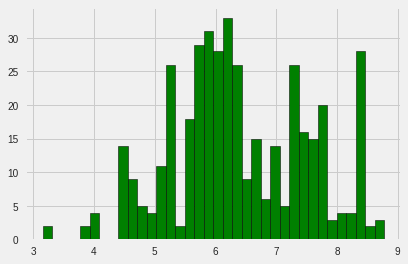

In [436]:
# take log transformation of Dis_to_MRT variable 
plt.hist(np.log(data_clean['Dis_to_MRT']), color = 'green', edgecolor = 'black',
         bins = int(180/5))

(array([67.,  0.,  0., 46.,  0.,  0.,  0., 24.,  0.,  0., 46.,  0.,  0.,
         0., 31.,  0.,  0.,  0., 67.,  0.,  0., 37.,  0.,  0.,  0., 31.,
         0.,  0., 30.,  0.,  0.,  0., 25.,  0.,  0., 10.]),
 array([ 0.        ,  0.27777778,  0.55555556,  0.83333333,  1.11111111,
         1.38888889,  1.66666667,  1.94444444,  2.22222222,  2.5       ,
         2.77777778,  3.05555556,  3.33333333,  3.61111111,  3.88888889,
         4.16666667,  4.44444444,  4.72222222,  5.        ,  5.27777778,
         5.55555556,  5.83333333,  6.11111111,  6.38888889,  6.66666667,
         6.94444444,  7.22222222,  7.5       ,  7.77777778,  8.05555556,
         8.33333333,  8.61111111,  8.88888889,  9.16666667,  9.44444444,
         9.72222222, 10.        ]),
 <a list of 36 Patch objects>)

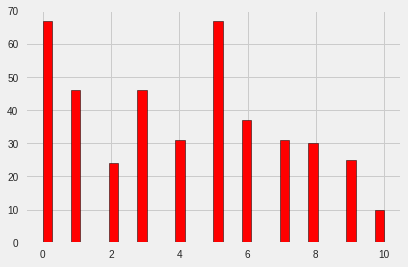

In [437]:
plt.hist(data_clean['Num_conv_stores'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

(array([ 3.,  0.,  3.,  0., 14.,  1.,  3., 14., 16., 10., 11., 10., 10.,
        35., 31., 27., 16., 24., 56., 27., 25., 37., 16.,  8.,  9.,  3.,
         2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([24.93207   , 24.93436222, 24.93665444, 24.93894667, 24.94123889,
        24.94353111, 24.94582333, 24.94811556, 24.95040778, 24.9527    ,
        24.95499222, 24.95728444, 24.95957667, 24.96186889, 24.96416111,
        24.96645333, 24.96874556, 24.97103778, 24.97333   , 24.97562222,
        24.97791444, 24.98020667, 24.98249889, 24.98479111, 24.98708333,
        24.98937556, 24.99166778, 24.99396   , 24.99625222, 24.99854444,
        25.00083667, 25.00312889, 25.00542111, 25.00771333, 25.01000556,
        25.01229778, 25.01459   ]),
 <a list of 36 Patch objects>)

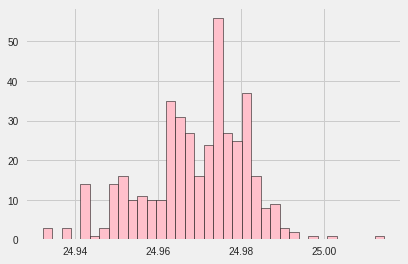

In [438]:
plt.hist(data_clean['Lat'], color = 'pink', edgecolor = 'black',
         bins = int(180/5))

(array([ 2.,  0.,  1.,  0.,  2.,  0.,  0.,  0., 10.,  0.,  0., 18.,  0.,
         2.,  5., 26., 22.,  6.,  1.,  1.,  8., 11., 16., 25., 41., 39.,
        60., 67., 18., 22.,  3.,  3.,  0.,  2.,  1.,  2.]),
 array([121.47353   , 121.47610611, 121.47868222, 121.48125833,
        121.48383444, 121.48641056, 121.48898667, 121.49156278,
        121.49413889, 121.496715  , 121.49929111, 121.50186722,
        121.50444333, 121.50701944, 121.50959556, 121.51217167,
        121.51474778, 121.51732389, 121.5199    , 121.52247611,
        121.52505222, 121.52762833, 121.53020444, 121.53278056,
        121.53535667, 121.53793278, 121.54050889, 121.543085  ,
        121.54566111, 121.54823722, 121.55081333, 121.55338944,
        121.55596556, 121.55854167, 121.56111778, 121.56369389,
        121.56627   ]),
 <a list of 36 Patch objects>)

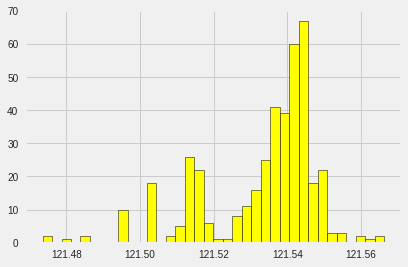

In [439]:
plt.hist(data_clean['Long'], color = 'yellow', edgecolor = 'black',
         bins = int(180/5))

(array([ 2.,  0.,  1.,  0.,  2.,  0.,  0.,  0., 10.,  0.,  0., 18.,  0.,
         2.,  5., 26., 22.,  6.,  1.,  1.,  8., 11., 16., 25., 41., 39.,
        59., 68., 18., 22.,  3.,  3.,  0.,  2.,  1.,  2.]),
 array([4.79969638, 4.79971758, 4.79973878, 4.79975998, 4.79978118,
        4.79980237, 4.79982357, 4.79984477, 4.79986597, 4.79988717,
        4.79990837, 4.79992957, 4.79995077, 4.79997197, 4.79999317,
        4.80001437, 4.80003556, 4.80005676, 4.80007796, 4.80009916,
        4.80012036, 4.80014156, 4.80016276, 4.80018396, 4.80020516,
        4.80022636, 4.80024756, 4.80026875, 4.80028995, 4.80031115,
        4.80033235, 4.80035355, 4.80037475, 4.80039595, 4.80041715,
        4.80043835, 4.80045955]),
 <a list of 36 Patch objects>)

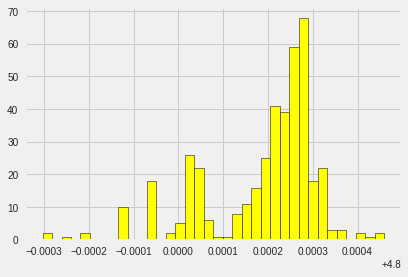

In [440]:
# take log transformation of Long variable 
plt.hist(np.log(data_clean['Long']), color = 'yellow', edgecolor = 'black',
         bins = int(180/5))

# Result: not much difference

(array([ 1., 10., 11., 13., 22., 33., 26., 29., 22., 36., 44., 41., 30.,
        24., 22., 19., 10.,  8.,  5.,  1.,  3.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  7.6       ,  10.65277778,  13.70555556,  16.75833333,
         19.81111111,  22.86388889,  25.91666667,  28.96944444,
         32.02222222,  35.075     ,  38.12777778,  41.18055556,
         44.23333333,  47.28611111,  50.33888889,  53.39166667,
         56.44444444,  59.49722222,  62.55      ,  65.60277778,
         68.65555556,  71.70833333,  74.76111111,  77.81388889,
         80.86666667,  83.91944444,  86.97222222,  90.025     ,
         93.07777778,  96.13055556,  99.18333333, 102.23611111,
        105.28888889, 108.34166667, 111.39444444, 114.44722222,
        117.5       ]),
 <a list of 36 Patch objects>)

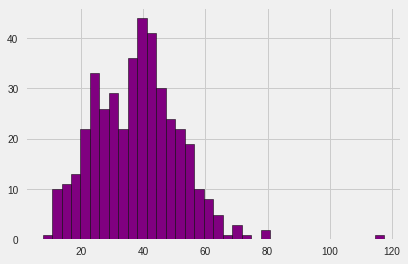

In [441]:
plt.hist(data_clean['Price'], color = 'purple', edgecolor = 'black',
         bins = int(180/5))

Log transformation (normalization) is only worth on Dis_to_MRT and 

In [442]:
data_clean['Log_Dis_to_MRT'] = np.log(data_clean['Dis_to_MRT'])
data_clean.head()

,Age,Dis_to_MRT,Num_conv_stores,Lat,Long,Price,2013,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Log_Dis_to_MRT
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,0,0,0,0,0,1,0,0,4.441225
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,0,0,0,0,0,1,0,0,5.725527
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,0,1,0,0,0,0,0,0,6.331474
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,0,0,1,0,0,0,0,0,6.331474
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,0,0,0,0,0,0,1,0,5.967603


## Check for pairwise linear relationship between each continuous variables and dependent variable

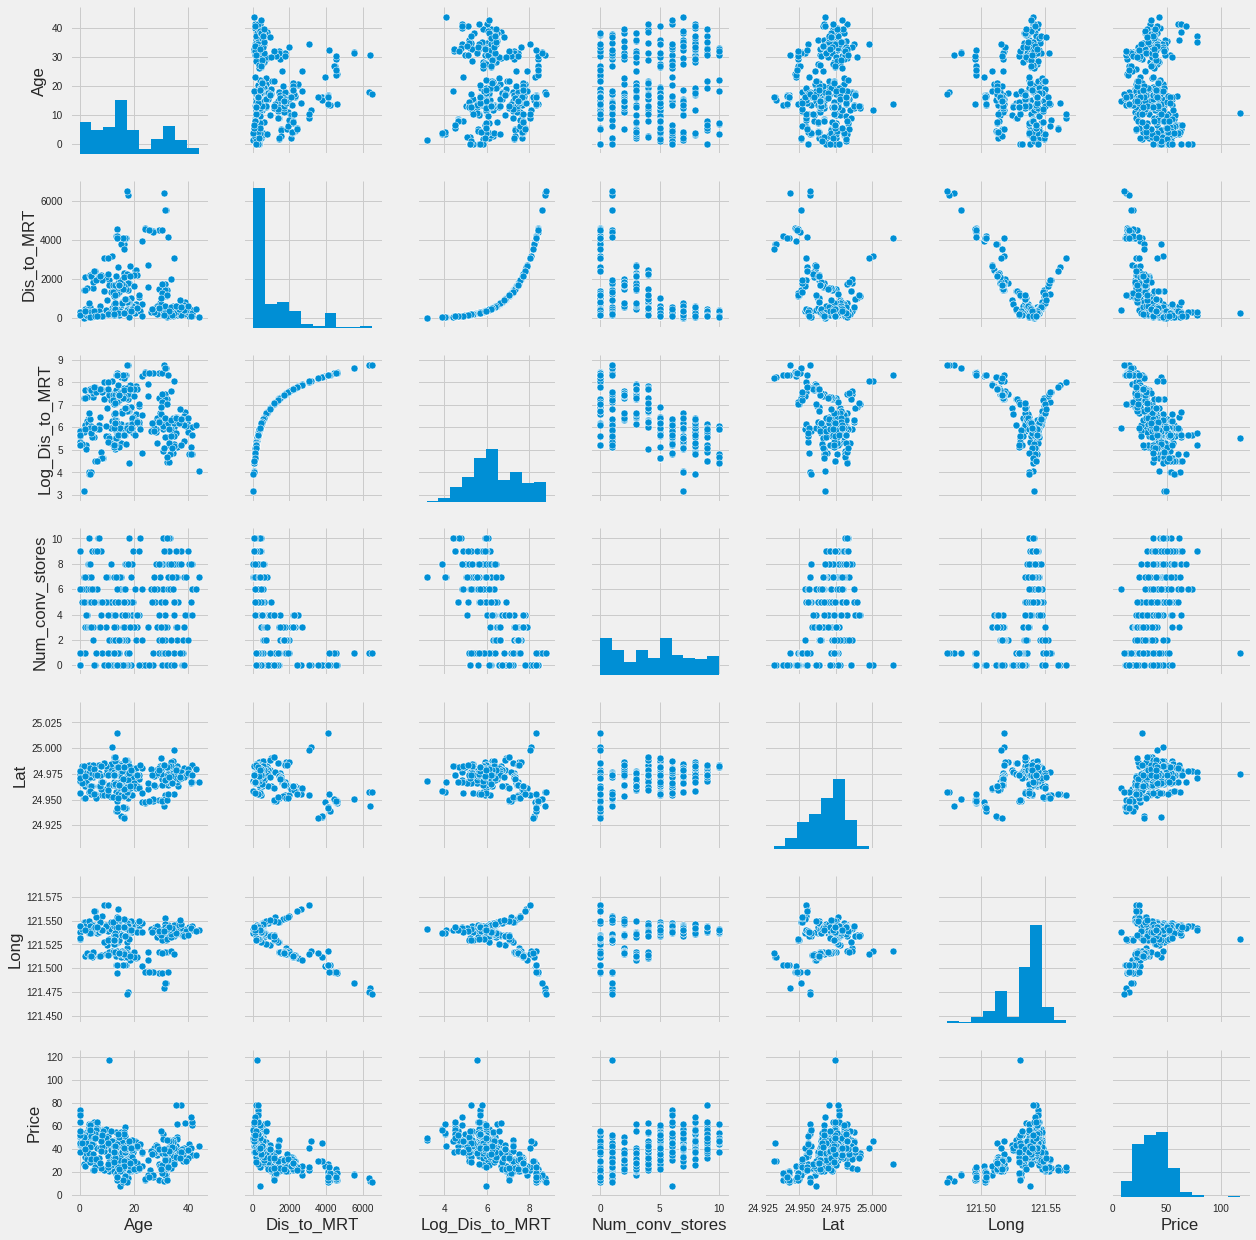

In [443]:
import seaborn as sns
data_continuous= data_clean.loc[:,['Age','Dis_to_MRT','Log_Dis_to_MRT','Num_conv_stores','Lat','Long','Price']]
#data_continuous.head()
sns.pairplot(data_continuous)

Looks like there is a polynomial relationship between Price and Age/Lat/Long. 

Let's try the polynominal regression

In [444]:
data_clean['Age_Squared']=np.square(data_clean['Age'])
data_clean['Lat_Squared']=np.square(data_clean['Lat'])
data_clean['Long_Squared']=np.square(data_clean['Long'])
data_clean.head()

,Age,Dis_to_MRT,Num_conv_stores,Lat,Long,Price,2013,Apr,Aug,Feb,...,Jun,Mar,May,Nov,Oct,Sep,Log_Dis_to_MRT,Age_Squared,Lat_Squared,Long_Squared
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,...,0,0,0,1,0,0,4.441225,1024.00,624.149290,14772.029939
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,...,0,0,0,1,0,0,5.725527,380.25,624.017387,14771.852491
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,...,0,0,0,0,0,0,6.331474,176.89,624.373157,14772.922058
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,...,1,0,0,0,0,0,6.331474,176.89,624.373157,14772.922058
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,...,0,0,0,0,1,0,5.967603,25.00,623.968926,14772.567152


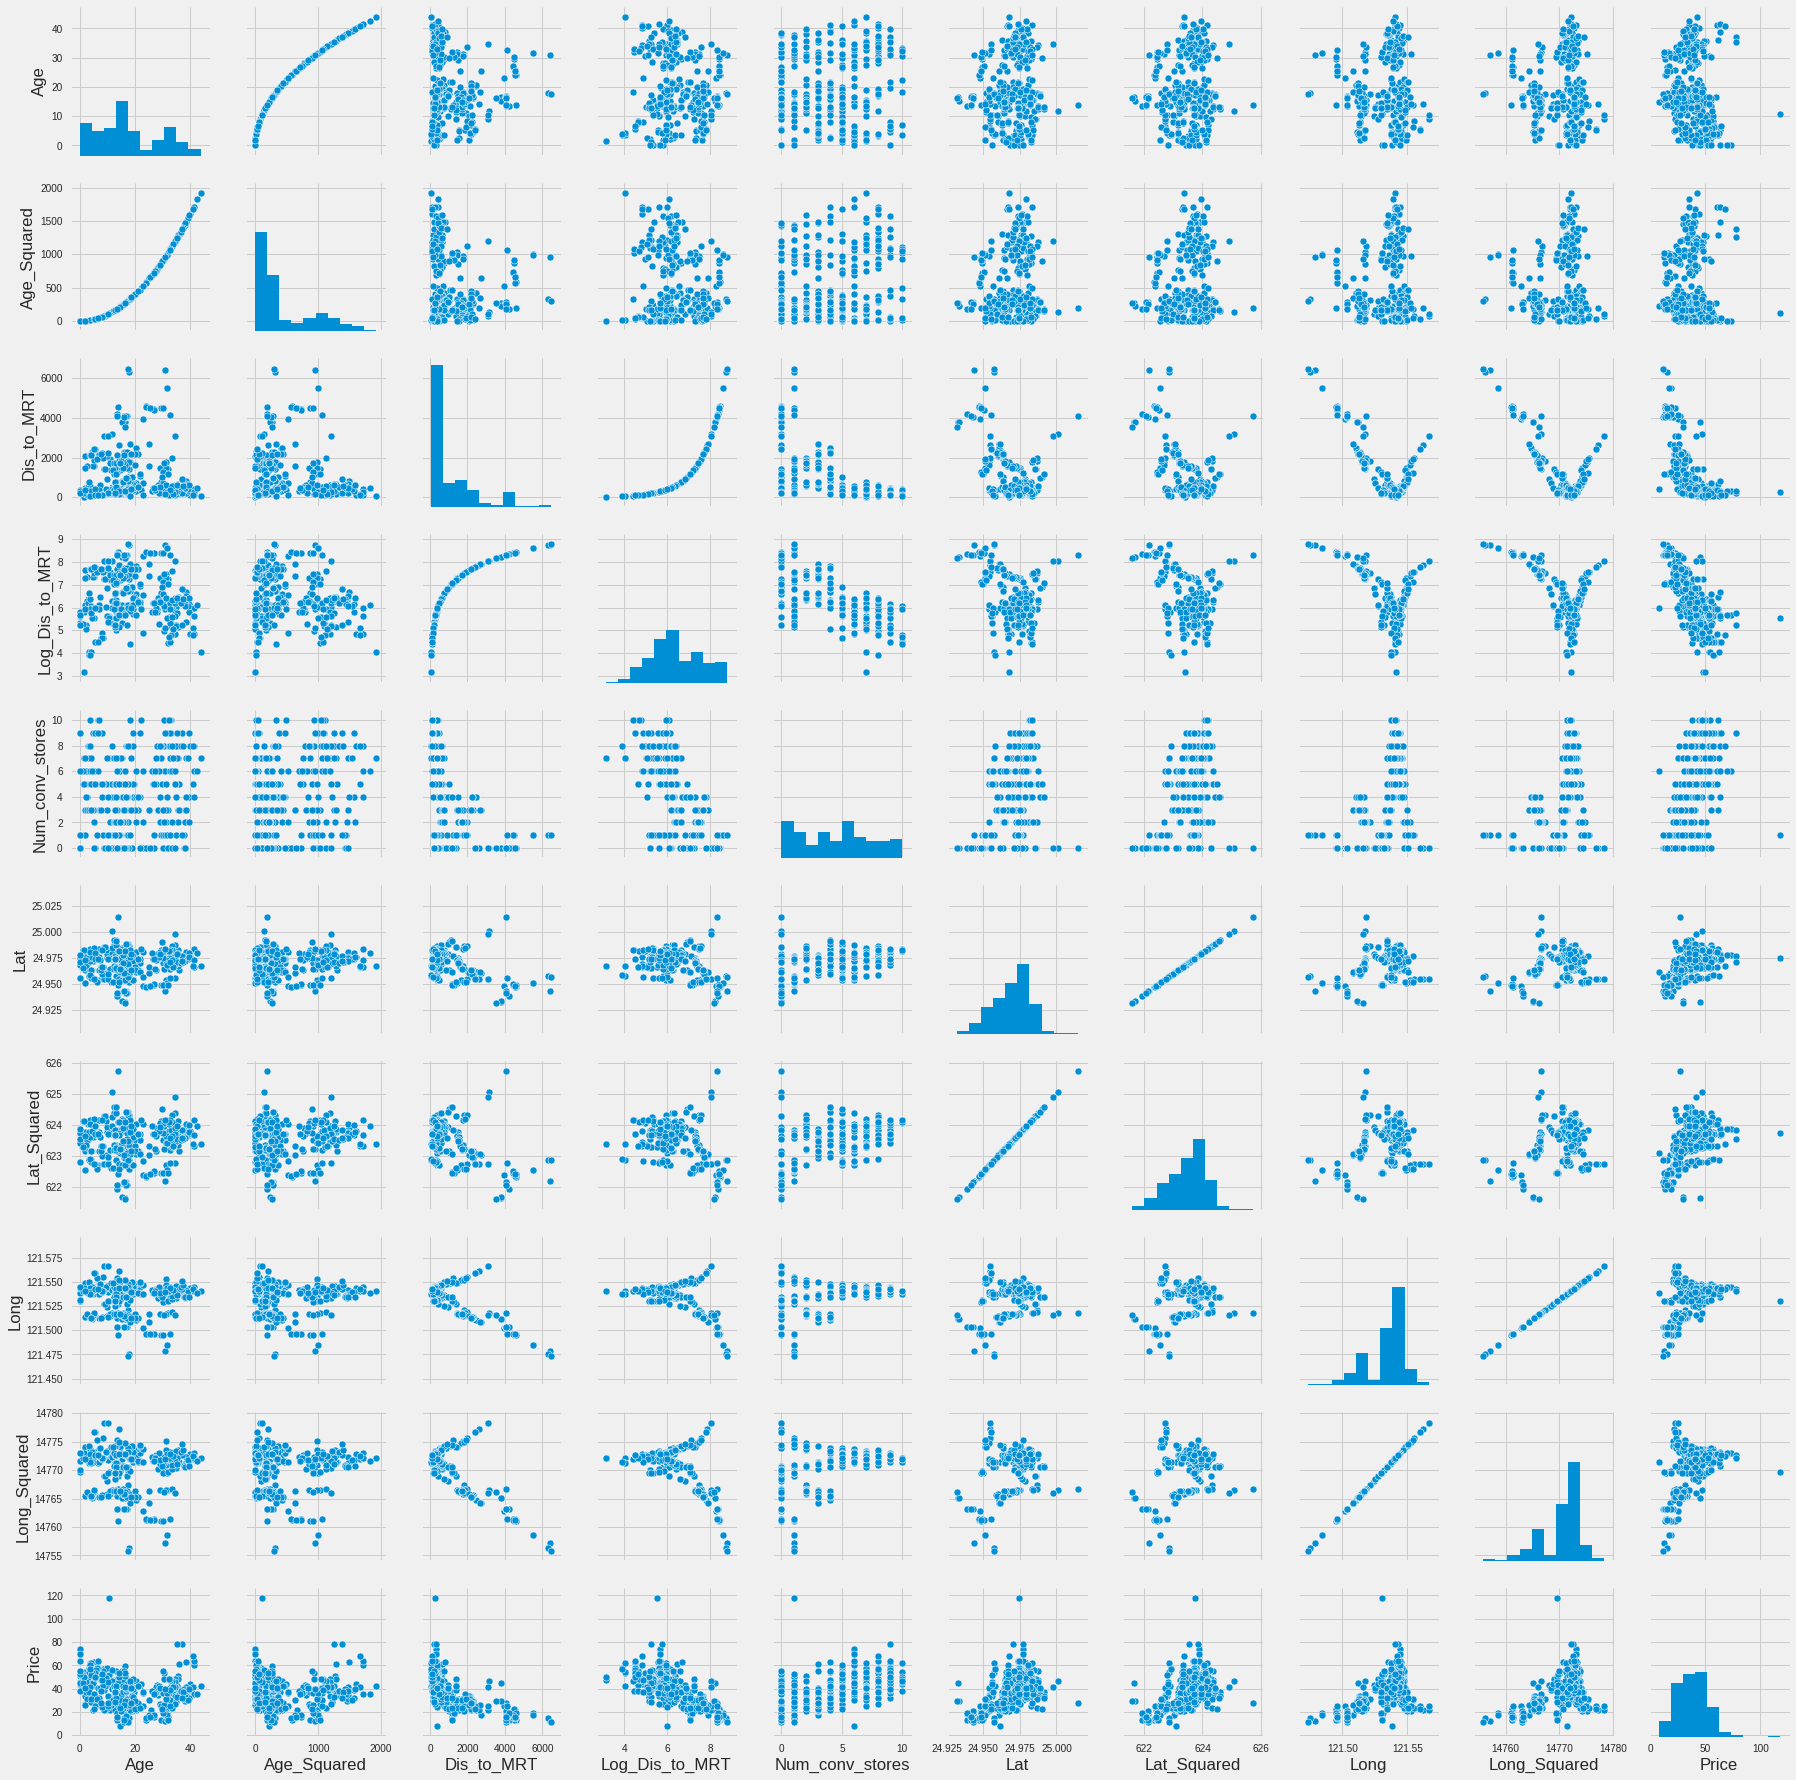

In [445]:
data_continuous= data_clean.loc[:,['Age','Age_Squared','Dis_to_MRT','Log_Dis_to_MRT','Num_conv_stores','Lat','Lat_Squared','Long','Long_Squared','Price']]
#data_continuous.head()
sns.pairplot(data_continuous)

Looks like squaring it didn't establish a more linear relationship. We won't do further non-linear transformations but this is soemthing we have to keep in mind.

We will use back the original variables except replacing Dis_to_MRT with Dis_to_MRT

## Standardization - Longtitude and Latitude

Another observation is that Lat and Long are all clustered within a small range. It is not surprising as Sindian district is relatively small so all houses have similar Latitude and Longitude. 

In this case, we will do a normalization so that we change the distribution to be mean 0 and standard deviation 1



In [446]:
from sklearn import preprocessing
data_clean['Lat_standardized'] = preprocessing.scale(data_clean['Lat'])
data_clean['Long_standardized']=preprocessing.scale(data_clean['Long'])
print(data_clean['Lat_standardized'].mean(axis=0),data_clean['Lat_standardized'].std(axis=0))

9.345396169216704e-14 1.0012099217976487


## Test for multicollinearity

In [447]:
data_continuous = data_continuous.drop(['Age_Squared','Lat_Squared','Long_Squared','Dis_to_MRT'],axis=1)
data_continuous.head()

,Age,Log_Dis_to_MRT,Num_conv_stores,Lat,Long,Price
0,32.0,4.441225,10,24.98298,121.54024,37.9
1,19.5,5.725527,9,24.98034,121.53951,42.2
2,13.3,6.331474,5,24.98746,121.54391,47.3
3,13.3,6.331474,5,24.98746,121.54391,54.8
4,5.0,5.967603,5,24.97937,121.54245,43.1


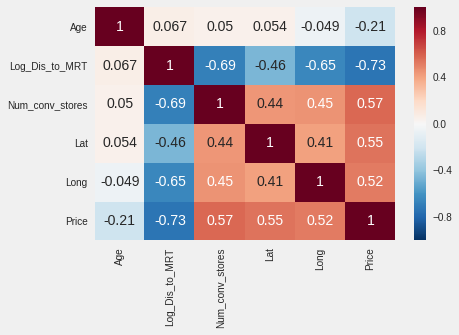

In [448]:
sns.heatmap(data_continuous.corr(), annot=True)

** Observation**:

Log_Dis_to_MRT is highly crrelated with Long, and Num_conv_stores and at the same time most highly correlated (although negatively) with price

## Build first regression model

In [449]:
data_clean.head()

,Age,Dis_to_MRT,Num_conv_stores,Lat,Long,Price,2013,Apr,Aug,Feb,...,May,Nov,Oct,Sep,Log_Dis_to_MRT,Age_Squared,Lat_Squared,Long_Squared,Lat_standardized,Long_standardized
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,0,...,0,1,0,0,4.441225,1024.00,624.149290,14772.029939,1.125430,0.448762
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,0,...,0,1,0,0,5.725527,380.25,624.017387,14771.852491,0.912444,0.401139
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,0,0,0,...,0,0,0,0,6.331474,176.89,624.373157,14772.922058,1.486860,0.688183
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,0,0,0,...,0,0,0,0,6.331474,176.89,624.373157,14772.922058,1.486860,0.688183
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,0,0,...,0,0,1,0,5.967603,25.00,623.968926,14772.567152,0.834188,0.592937


In [451]:
# We take Log_Dis_to_MRT so need to drop Dis_to_MRT
# We are no longer using the polynominals so dropping the squared variables
# We have standardized Lat and Long so dropping the original variables

data1 = data_clean.drop(['Age_Squared','Lat_Squared','Long_Squared','Dis_to_MRT','Lat','Long'],axis=1)
data1.head()

,Age,Num_conv_stores,Price,2013,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Log_Dis_to_MRT,Lat_standardized,Long_standardized
0,32.0,10,37.9,0,0,0,0,0,0,0,0,0,1,0,0,4.441225,1.125430,0.448762
1,19.5,9,42.2,0,0,0,0,0,0,0,0,0,1,0,0,5.725527,0.912444,0.401139
2,13.3,5,47.3,1,0,0,0,0,1,0,0,0,0,0,0,6.331474,1.486860,0.688183
3,13.3,5,54.8,1,0,0,0,0,0,1,0,0,0,0,0,6.331474,1.486860,0.688183
4,5.0,5,43.1,0,0,0,0,0,0,0,0,0,0,1,0,5.967603,0.834188,0.592937


In [0]:
Independent_Variables = data1.drop(['Price'],axis =1)
Dependent_Variables = data1['Price']

In [453]:
x_train, x_test, y_train, y_test = train_test_split(Independent_Variables, Dependent_Variables,
                                                    train_size=0.75, test_size=0.25)
print('Size of the training set:')
print(len(x_train), len(y_train))
print('')
print('Size of the test set:')
print(len(x_test), len(y_test))

Size of the training set:
310 310

Size of the test set:
104 104


In [454]:
x_train_2 = sm.add_constant(x_train)
x_test_2 =sm.add_constant(x_test)
reg3 = sm.OLS(y_train, x_train_2)
results = reg3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     31.78
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           1.41e-54
Time:                        08:11:21   Log-Likelihood:                -1094.8
No. Observations:                 310   AIC:                             2224.
Df Residuals:                     293   BIC:                             2287.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                66.0531      4.36

In [456]:
y_pred_test_2 = results.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))) 


Mean Absolute Error: 4.6092410626275075
Mean Squared Error: 46.912009749225604
Root Mean Squared Error: 6.849234245463182


# Iterate and Validate Until Succeed or Decide It Cannot Be Done

## Manual elimination of features

### Eliminating Num_Cov_stores

We learned that Log_Dis_to_MRT is highly correlated with Num_conv_stores. Given the latter is not a statistically significant variable, let's try to eliminate it


In [0]:
Independent_Variables_v2 = data1.drop(['Price','Num_conv_stores'],axis =1)
Dependent_Variables = data1['Price']

In [459]:
x_train, x_test, y_train, y_test = train_test_split(Independent_Variables_v2, Dependent_Variables,
                                                    train_size=0.75, test_size=0.25)
x_train_2 = sm.add_constant(x_train)
x_test_2 =sm.add_constant(x_test)
reg4 = sm.OLS(y_train, x_train_2)
results = reg4.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     36.02
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           1.22e-57
Time:                        08:13:31   Log-Likelihood:                -1098.9
No. Observations:                 310   AIC:                             2230.
Df Residuals:                     294   BIC:                             2290.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                72.5683      3.32

In [460]:
y_pred_test_2 = results.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))) 

Mean Absolute Error: 4.877648616873553
Mean Squared Error: 45.459950141863494
Root Mean Squared Error: 6.742399435057485


We see that the R-squared and adjusted R-squared both improved but RMSE increased

RMSE increased only slightly which is a good sign.

However, strong multucollinearity (likely due to categorical variables) still exists

### Eliminating Jan - May categorical variables and Long_standardized 

These variables are insignificant so let's see what happens when we remove them
We will put back Num_conv_stores

In [0]:
Independent_Variables_v3 = data1.drop(['Price','Jan','Feb','Mar','Apr','May','Long_standardized'],axis =1)
Dependent_Variables = data1['Price']

In [465]:
x_train, x_test, y_train, y_test = train_test_split(Independent_Variables_v3, Dependent_Variables,
                                                    train_size=0.75, test_size=0.25)
x_train_2 = sm.add_constant(x_train)
x_test_2 =sm.add_constant(x_test)
reg5 = sm.OLS(y_train, x_train_2)
results = reg5.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     48.56
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           7.59e-57
Time:                        08:20:55   Log-Likelihood:                -1104.6
No. Observations:                 310   AIC:                             2231.
Df Residuals:                     299   BIC:                             2272.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               68.8320      3.801  

In [466]:
y_pred_test_2 = results.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))) 

Mean Absolute Error: 4.497371304997771
Mean Squared Error: 36.95623208581104
Root Mean Squared Error: 6.0791637653390325


** Num_conv_stores still remain insgifnicant so we will remove it**

### Eliminating Jan - May categorical variables, Long_standardized and Num_conv_stores

In [0]:
Independent_Variables_v4 = data1.drop(['Price','Jan','Feb','Mar','Apr','May','Long_standardized','Num_conv_stores'],axis =1)
Dependent_Variables = data1['Price']

In [469]:
x_train, x_test, y_train, y_test = train_test_split(Independent_Variables_v4, Dependent_Variables,
                                                    train_size=0.75, test_size=0.25)
x_train_2 = sm.add_constant(x_train)
x_test_2 =sm.add_constant(x_test)
reg6 = sm.OLS(y_train, x_train_2)
results = reg6.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     72.82
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           3.51e-70
Time:                        08:26:44   Log-Likelihood:                -1046.1
No. Observations:                 310   AIC:                             2112.
Df Residuals:                     300   BIC:                             2150.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               70.0624      2.298  

In [470]:
y_pred_test_2 = results.predict(x_test_2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))) 

Mean Absolute Error: 5.832599023754229
Mean Squared Error: 109.3795550150822
Root Mean Squared Error: 10.45846810078236


In this case, RMSE increased but R-squared and adjusted R-squared both increased. 

We can conclude that this model is a decent model for the following reasons:

1) All coefficient have the expected signs (e.g. we expect age to be negatively correlated to price and that was the case with a negative coefficient to Age variable)

2) Most coefficients are significant except Jul

3) This regression explains almost 70% of the variation in price so if we are given a set of independent variables (its Age, distance to MRT, Latitude, transaction year and month), we can predict the housing price relatively well. 

We can of course continue to improve the regression with various statistical tests and feature selection techniques such as Variance Inflation Factors (VIF) and Recursive Feature Estimation (RFE). 

We will go through them in later chapters. 

# CommandCommunicate results back to stakeholders

A few things we need to take note of in the communication:

1) Correlation is not the same as causality

We can only say increasing the age of the house is correlated to a decrease of 2090 New Taiwan Dollar/Ping (where Ping is a local unit equivalent to 3.3 square meters) **on average**, all things equal.

We don't know whether the age causes the reduction in price unless we can have a parallel universe where two identical houses have different ages. Then any price difference would be attributed to age differences

2) It is not true that we can explain 70% of the housing price. We can explain 70% of the **price deviation from average price**. 

3) The most commonly communication is that for some reasons if we don't have access to past transaction data or the data wasn't available for selected housing sales. We can use the linear model to predict transaction price with a certain confidence if we know the Age, transaction year (if 2012 or 2013), transaction month, distance to MRT and latitude. 

4) When we do the prediction we need to be mindful of the variable transformation we have done. For example, distance_to_MRT needs to go through log transformation before being plugged in the model. Likewise, Latitude needs to go through standardization before being used in the regression model
